In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.utils import resample

In [2]:
data=pd.read_csv("customer_churn.csv")
# data
data.Churn.value_counts(dropna=False)
data['Churn'].isna().sum()
data.head(50)
# data.shape

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [3]:
X = data[['tenure','SeniorCitizen','MonthlyCharges']]
y = data["Churn"]

In [4]:
y.replace(('Yes', 'No'), (1, 0), inplace=True)
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [6]:
# all features are numeric, so no need to split into _num and _cat
transformer = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(transformer.transform(X_train),columns=X.columns)
# because this is the only tranformation we apply to the numerics, 
# we can immediately transform the X_test as well
X_test_scaled = pd.DataFrame(transformer.transform(X_test),columns=X.columns)
X_train_scaled

,tenure,SeniorCitizen,MonthlyCharges
0,-0.340191,-0.435476,-0.514314
1,0.883210,2.296336,0.017840
2,-1.196572,-0.435476,-0.819594
3,1.168670,-0.435476,-1.483535
4,-0.829552,-0.435476,0.658427
...,...,...,...
5277,-0.707212,-0.435476,1.292341
5278,-0.911112,-0.435476,0.880297
5279,1.046330,-0.435476,-1.466853
5280,-1.278132,2.296336,0.167978


In [7]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

In [8]:
logits = np.log(1/LR.predict_proba(X_train_scaled)[:,1]-1)

<AxesSubplot:>

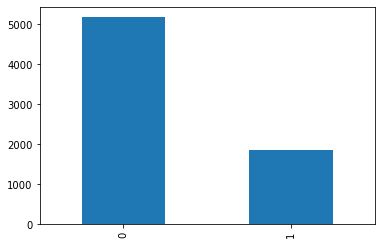

In [9]:
count_classes = data['Churn'].value_counts()
count_classes.plot(kind = 'bar')

In [10]:
count_classes = data['Churn'].value_counts()
count_classes

0    5174
1    1869
Name: Churn, dtype: int64

In [11]:
5174/(5174+1869)

0.7346301292063041

In [12]:
LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_scaled, y_train)
LR.score(X_test_scaled, y_test)
# we are getting more then 70% accuracy because our samples are 73% 'yes' 
# meaning at least 73% of our model will predict 'yes' (it will be corect but not exact enough)

0.7808063600227144

In [13]:
pred = LR.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.6115942028985507
recall:  0.4557235421166307
f1:  0.5222772277227723


In [23]:
X_train_scaled=X_train_scaled.reset_index()

In [24]:
y_train=y_train.reset_index()

In [47]:
train = pd.concat([X_train_scaled, y_train],axis=1)
train=train.drop(['index','index'],axis=1)
train
# train.reset_index(drop=True)
# train = train[~train['Churn'].isna()]
# train = train.reindex(index=[i for i in range(train.shape[0])])
# oversampling
# train.head(50)
# X_train_scaled.isna().sum()
# train.shape

,tenure,SeniorCitizen,MonthlyCharges,Churn
0,-0.340191,-0.435476,-0.514314,0
1,0.883210,2.296336,0.017840,0
2,-1.196572,-0.435476,-0.819594,1
3,1.168670,-0.435476,-1.483535,0
4,-0.829552,-0.435476,0.658427,1
...,...,...,...,...
5277,-0.707212,-0.435476,1.292341,0
5278,-0.911112,-0.435476,0.880297,0
5279,1.046330,-0.435476,-1.466853,0
5280,-1.278132,2.296336,0.167978,1


In [48]:
no = train[train['Churn']==0]
yes = train[train['Churn']==1]
train.head()

,tenure,SeniorCitizen,MonthlyCharges,Churn
0,-0.340191,-0.435476,-0.514314,0
1,0.883210,2.296336,0.017840,0
2,-1.196572,-0.435476,-0.819594,1
3,1.168670,-0.435476,-1.483535,0
4,-0.829552,-0.435476,0.658427,1


In [49]:
display(no.shape)
display(yes.shape)

(3876, 4)

(1406, 4)

In [50]:
yes_oversampled = resample(yes, #<- sample from here
                                    replace=True, #<- we need replacement, since we don't have enough data otherwise
                                    n_samples = len(no),#<- make both sets the same size
                                    random_state=0)

In [51]:
yes_oversampled

,tenure,SeniorCitizen,MonthlyCharges,Churn
2453,-1.278132,-0.435476,0.156300,1
1976,-1.278132,-0.435476,1.168894,1
4528,-1.196572,-0.435476,-0.319135,1
3011,-1.278132,-0.435476,0.488271,1
2758,-1.155792,-0.435476,-1.460181,1
...,...,...,...,...
405,-0.584871,-0.435476,0.866951,1
3552,-0.421751,-0.435476,0.843597,1
2524,0.842430,-0.435476,1.123853,1
1628,-1.278132,-0.435476,-0.464268,1


In [52]:
display(no.shape)
display(yes_oversampled.shape)    #now we get the same number of samples

(3876, 4)

(3876, 4)

In [53]:
train_oversampled = pd.concat([no,yes_oversampled],axis=0)
train_oversampled

,tenure,SeniorCitizen,MonthlyCharges,Churn
0,-0.340191,-0.435476,-0.514314,0
1,0.883210,2.296336,0.017840,0
3,1.168670,-0.435476,-1.483535,0
5,1.046330,-0.435476,0.503285,0
6,-0.258631,-0.435476,0.701800,0
...,...,...,...,...
405,-0.584871,-0.435476,0.866951,1
3552,-0.421751,-0.435476,0.843597,1
2524,0.842430,-0.435476,1.123853,1
1628,-1.278132,-0.435476,-0.464268,1


In [54]:
y_train_over = train_oversampled['Churn'].copy()
X_train_over = train_oversampled.drop('Churn',axis = 1).copy()

In [55]:
X_train_over

,tenure,SeniorCitizen,MonthlyCharges
0,-0.340191,-0.435476,-0.514314
1,0.883210,2.296336,0.017840
3,1.168670,-0.435476,-1.483535
5,1.046330,-0.435476,0.503285
6,-0.258631,-0.435476,0.701800
...,...,...,...
405,-0.584871,-0.435476,0.866951
3552,-0.421751,-0.435476,0.843597
2524,0.842430,-0.435476,1.123853
1628,-1.278132,-0.435476,-0.464268


In [56]:
y_train_over

0       0
1       0
3       0
5       0
6       0
       ..
405     1
3552    1
2524    1
1628    1
4123    1
Name: Churn, Length: 7752, dtype: int64

In [57]:
X_train_over

,tenure,SeniorCitizen,MonthlyCharges
0,-0.340191,-0.435476,-0.514314
1,0.883210,2.296336,0.017840
3,1.168670,-0.435476,-1.483535
5,1.046330,-0.435476,0.503285
6,-0.258631,-0.435476,0.701800
...,...,...,...
405,-0.584871,-0.435476,0.866951
3552,-0.421751,-0.435476,0.843597
2524,0.842430,-0.435476,1.123853
1628,-1.278132,-0.435476,-0.464268


In [59]:
LR = LogisticRegression(max_iter=1000)
LR.fit(X_train_over, y_train_over)
pred = LR.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.4790764790764791
recall:  0.7170626349892009
f1:  0.57439446366782


In [ ]:
# my predictions are not getting a lot better and i dont really understand why... (recall got better)

In [63]:
y_train=y_train.drop(['index'],axis=1)
y_train

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
5277,0
5278,0
5279,0
5280,1


In [67]:
X_train_scaled = X_train_scaled.drop(['index'],axis=1)
X_train_scaled

,tenure,SeniorCitizen,MonthlyCharges
0,-0.340191,-0.435476,-0.514314
1,0.883210,2.296336,0.017840
2,-1.196572,-0.435476,-0.819594
3,1.168670,-0.435476,-1.483535
4,-0.829552,-0.435476,0.658427
...,...,...,...
5277,-0.707212,-0.435476,1.292341
5278,-0.911112,-0.435476,0.880297
5279,1.046330,-0.435476,-1.466853
5280,-1.278132,2.296336,0.167978


In [68]:
#SMOTE
sm = SMOTE(random_state=100,k_neighbors=3)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_scaled,y_train)

In [69]:
LR = LogisticRegression(max_iter=1000)
LR.fit(X_train_SMOTE, y_train_SMOTE)
pred = LR.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.4776978417266187
recall:  0.7170626349892009
f1:  0.5734024179620035


C:\Users\oshi\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
